#### Problem Statement 
The data is related to a marketing campaign done by a Portuguese Bank. The campaigns were telephonic, i.e., sales agents made phone calls to sell a term deposit product. 

The business objectives are:-
- To reduce customer acquisition cost by targeting the ones who are likely to buy
- To improve the response rate, i.e., the fraction of prospects who respond to the campaign

We will follow below steps:-

- Read and understand the data
- Exploratort data analysis
- Prepare the data for modelling
- Modle evaluation
- Create Gain and Lift charts, and finacial benefits for the banks for customer acquisition by using the model

In [101]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [102]:
import warnings
warnings.filterwarnings('ignore')

## Read and understand the data

In [103]:
data = pd.read_csv('bank_marketing.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [104]:
data.shape

(41188, 21)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [106]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Drop duration column
Because, when an executive picks up the phone and calls a prospective client, he/she is unsure of the duration of the call. 

In [107]:
# Drop duration
data.drop('duration', axis=1, inplace=True)

#### Treating Missing Values in columns

In [108]:
# Cheking percent of missing values in columns
(data.isnull().sum()/len(data.index))*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
response          0.0
dtype: float64

We can see there is no missing values in any column.

### Checking response variable

In [109]:
data['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

We can see that there is an imbalance in the response rate.

In [110]:
# Converting yes to 1 an and no to 0
data['response'] = data['response'].map({'yes':1, 'no':0})

In [111]:
data['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [112]:
# Response rate
round((data['response'].sum()/len(data.index))*100,2)

11.27

## Exploratory Data Analysis

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

<AxesSubplot:xlabel='age'>

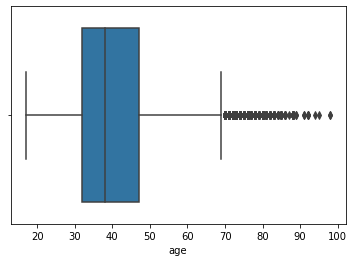

In [113]:
sns.boxplot(x='age', data=data)

We can see above 70 years of age there are many outliers. We can cap the age to 70 so that the model behaviour doesn't change significantly with the age above 70.

In [114]:
data['age'][data['age']>70] = 70

<AxesSubplot:xlabel='age'>

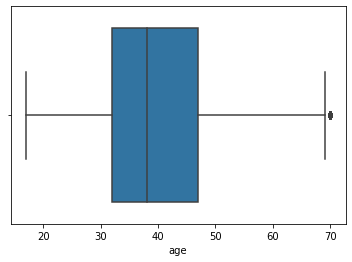

In [115]:
sns.boxplot(x='age', data=data)

In [116]:
# create age bins
bins = np.arange(10,data['age'].max()+10,10)
data['age_bins'] = pd.cut(data['age'], bins)
data['age_bins']

0        (50, 60]
1        (50, 60]
2        (30, 40]
3        (30, 40]
4        (50, 60]
           ...   
41183    (60, 70]
41184    (40, 50]
41185    (50, 60]
41186    (40, 50]
41187    (60, 70]
Name: age_bins, Length: 41188, dtype: category
Categories (6, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [117]:
no_of_prospects = data.groupby('age_bins')['response'].count().reset_index(name='no_of_prospects')
no_of_prospects

,age_bins,no_of_prospects
0,"(10, 20]",140
1,"(20, 30]",7243
2,"(30, 40]",16385
3,"(40, 50]",10240
4,"(50, 60]",6270
5,"(60, 70]",910


In [118]:
count_yes_prospects = data[data['response']==1].groupby('age_bins')['response'].count().reset_index(name='count_yes_prospects')
count_yes_prospects

,age_bins,count_yes_prospects
0,"(10, 20]",57
1,"(20, 30]",1067
2,"(30, 40]",1597
3,"(40, 50]",837
4,"(50, 60]",668
5,"(60, 70]",414


In [119]:
age_df = no_of_prospects.merge(count_yes_prospects, on='age_bins')
age_df.head()

,age_bins,no_of_prospects,count_yes_prospects
0,"(10, 20]",140,57
1,"(20, 30]",7243,1067
2,"(30, 40]",16385,1597
3,"(40, 50]",10240,837
4,"(50, 60]",6270,668


In [120]:
age_df['response_rate'] = ((age_df['count_yes_prospects']/age_df['no_of_prospects'])*100).round(2)
age_df

,age_bins,no_of_prospects,count_yes_prospects,response_rate
0,"(10, 20]",140,57,40.71
1,"(20, 30]",7243,1067,14.73
2,"(30, 40]",16385,1597,9.75
3,"(40, 50]",10240,837,8.17
4,"(50, 60]",6270,668,10.65
5,"(60, 70]",910,414,45.49


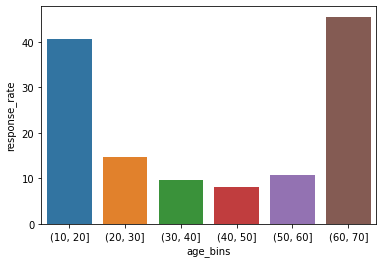

In [121]:
sns.barplot(x='age_bins', y='response_rate', data=age_df)
plt.show()

We can see that the youngest and eldest have more response rate than others, keeping in mind that number of prospects is very less for the youngest.

#### Job

In [122]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [123]:
no_of_prospects = data.groupby('job')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('job')['response'].sum().reset_index(name='count_yes_prospects')
job_df = no_of_prospects.merge(count_yes_prospects, on='job')
job_df['response_rate'] = ((job_df['count_yes_prospects']/job_df['no_of_prospects'])*100).round(2)
job_df

,job,no_of_prospects,count_yes_prospects,response_rate
0,admin.,10422,1352,12.97
1,blue-collar,9254,638,6.89
2,entrepreneur,1456,124,8.52
3,housemaid,1060,106,10.00
4,management,2924,328,11.22
5,retired,1720,434,25.23
6,self-employed,1421,149,10.49
7,services,3969,323,8.14
8,student,875,275,31.43
9,technician,6743,730,10.83


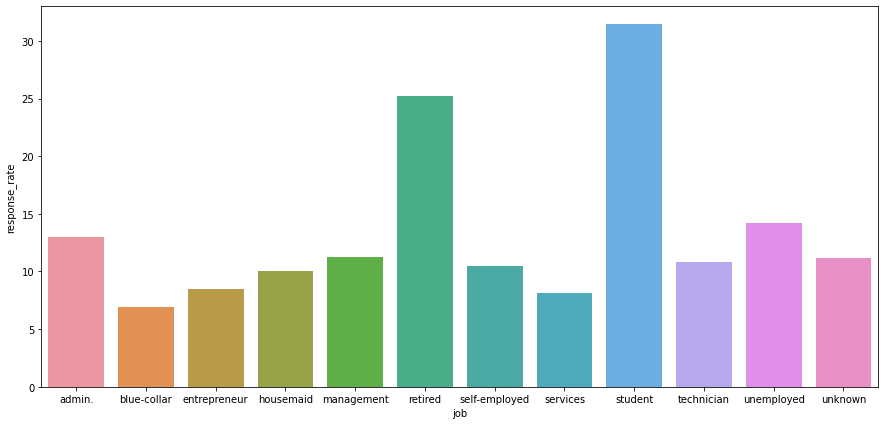

In [124]:
plt.figure(figsize=(15,7))
sns.barplot(x='job', y='response_rate', data=job_df)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [125]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [126]:
no_of_prospects = data.groupby('marital')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('marital')['response'].sum().reset_index(name='count_yes_prospects')
marital_df = no_of_prospects.merge(count_yes_prospects, on='marital')
marital_df['response_rate'] = ((marital_df['count_yes_prospects']/marital_df['no_of_prospects'])*100).round(2)
marital_df

,marital,no_of_prospects,count_yes_prospects,response_rate
0,divorced,4612,476,10.32
1,married,24928,2532,10.16
2,single,11568,1620,14.00
3,unknown,80,12,15.00


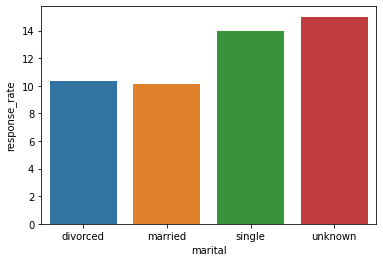

In [127]:
sns.barplot(x='marital', y='response_rate', data=marital_df)
plt.show()

We can see that singles are more likely to response positive that other groups.

#### Education

In [128]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [129]:
data.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [130]:
data['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [131]:
no_of_prospects = data.groupby('education')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('education')['response'].sum().reset_index(name='count_yes_prospects')
education_df = no_of_prospects.merge(count_yes_prospects, on='education')
education_df['response_rate'] = ((education_df['count_yes_prospects']/education_df['no_of_prospects'])*100).round(2)
education_df

,education,no_of_prospects,count_yes_prospects,response_rate
0,Primary_Education,12531,1093,8.72
1,Secondary_Education,9515,1031,10.84
2,Tertiary_Education,12168,1670,13.72
3,professional.course,5243,595,11.35
4,unknown,1731,251,14.50


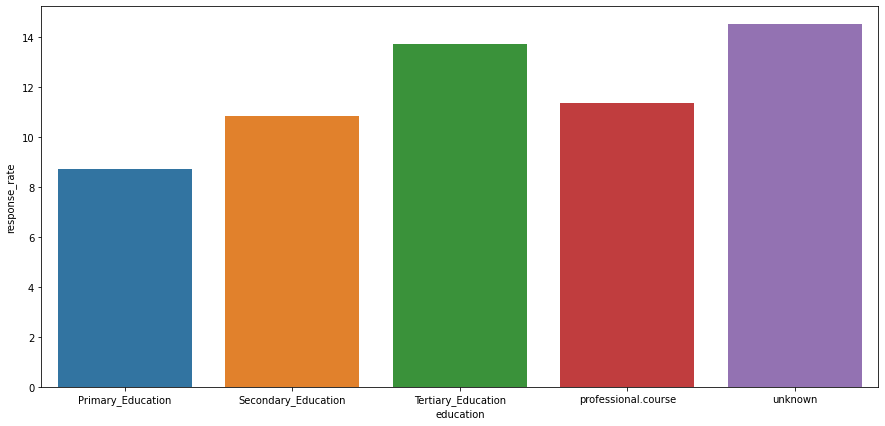

In [132]:
plt.figure(figsize=(15,7))
sns.barplot(x='education', y='response_rate', data=education_df)
plt.show()

We van see that Primary Education group has the lowest response rate, which is reasonable because may be because of lack of education people are not able to trust the bank.

#### Previous Default

In [133]:
# Default column
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

As we can see that most of the values are unknown and only three values are yes for default column. Hence, it is better to drop the column as the colimn doesn't have much variance.

In [134]:
#Dropping default column
data.drop('default', axis=1, inplace=True)

#### Housing


In [135]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [136]:
no_of_prospects = data.groupby('housing')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('housing')['response'].sum().reset_index(name='count_yes_prospects')
housing_df = no_of_prospects.merge(count_yes_prospects, on='housing')
housing_df['response_rate'] = ((housing_df['count_yes_prospects']/housing_df['no_of_prospects'])*100).round(2)
housing_df

,housing,no_of_prospects,count_yes_prospects,response_rate
0,no,18622,2026,10.88
1,unknown,990,107,10.81
2,yes,21576,2507,11.62


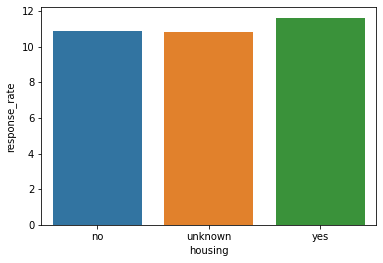

In [137]:
sns.barplot(x='housing', y='response_rate', data=housing_df)
plt.show()

We can see that there is a slight uptick on the response rate for the people having housing.

#### Loan

In [138]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [139]:
no_of_prospects = data.groupby('loan')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('loan')['response'].sum().reset_index(name='count_yes_prospects')
loan_df = no_of_prospects.merge(count_yes_prospects, on='loan')
loan_df['response_rate'] = ((loan_df['count_yes_prospects']/loan_df['no_of_prospects'])*100).round(2)
loan_df

,loan,no_of_prospects,count_yes_prospects,response_rate
0,no,33950,3850,11.34
1,unknown,990,107,10.81
2,yes,6248,683,10.93


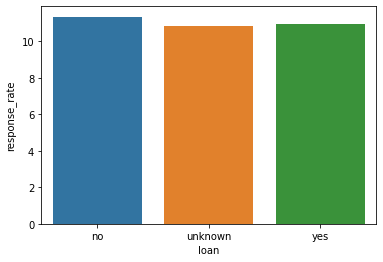

In [140]:
sns.barplot(x='loan', y='response_rate', data=loan_df)
plt.show()

There in no notable difference between the groups having housing loan on the response rate of the investment product.

Now we will look at the client data.
- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week

#### Contact

In [141]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [142]:
no_of_prospects = data.groupby('contact')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('contact')['response'].sum().reset_index(name='count_yes_prospects')
contact_df = no_of_prospects.merge(count_yes_prospects, on='contact')
contact_df['response_rate'] = ((contact_df['count_yes_prospects']/contact_df['no_of_prospects'])*100).round(2)
contact_df

,contact,no_of_prospects,count_yes_prospects,response_rate
0,cellular,26144,3853,14.74
1,telephone,15044,787,5.23


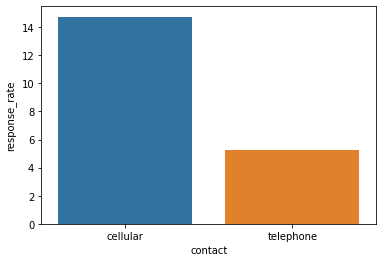

In [143]:
sns.barplot(x='contact', y='response_rate', data=contact_df)
plt.show()

Here the difference is clear. The prospects lcontacted with cellular medimum are more likely to convert as a customer.

#### Month

In [144]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [145]:
no_of_prospects = data.groupby('month')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('month')['response'].sum().reset_index(name='count_yes_prospects')
month_df = no_of_prospects.merge(count_yes_prospects, on='month')
month_df['response_rate'] = ((month_df['count_yes_prospects']/month_df['no_of_prospects'])*100).round(2)
month_df

,month,no_of_prospects,count_yes_prospects,response_rate
0,apr,2632,539,20.48
1,aug,6178,655,10.60
2,dec,182,89,48.90
3,jul,7174,649,9.05
4,jun,5318,559,10.51
5,mar,546,276,50.55
6,may,13769,886,6.43
7,nov,4101,416,10.14
8,oct,718,315,43.87
9,sep,570,256,44.91


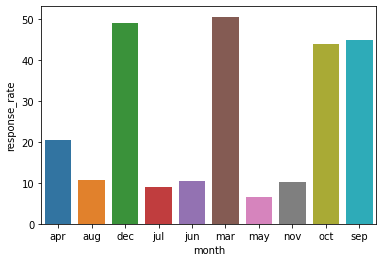

In [146]:
sns.barplot(x='month', y='response_rate', data=month_df)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [147]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [148]:
no_of_prospects = data.groupby('day_of_week')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('day_of_week')['response'].sum().reset_index(name='count_yes_prospects')
day_of_week_df = no_of_prospects.merge(count_yes_prospects, on='day_of_week')
day_of_week_df['response_rate'] = ((day_of_week_df['count_yes_prospects']/day_of_week_df['no_of_prospects'])*100).round(2)
day_of_week_df

,day_of_week,no_of_prospects,count_yes_prospects,response_rate
0,fri,7827,846,10.81
1,mon,8514,847,9.95
2,thu,8623,1045,12.12
3,tue,8090,953,11.78
4,wed,8134,949,11.67


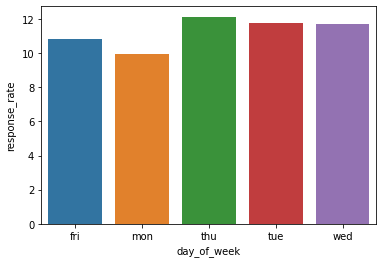

In [149]:
sns.barplot(x='day_of_week', y='response_rate', data=day_of_week_df)
plt.show()

The response rate is highest on Thursday and lowest on Monday, the the difference is not much.

Now, we will lok at the data related to last contacts.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

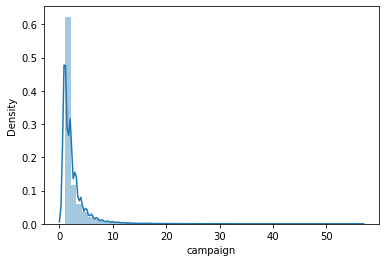

In [150]:
sns.distplot(data['campaign'])
plt.show()

<AxesSubplot:xlabel='campaign'>

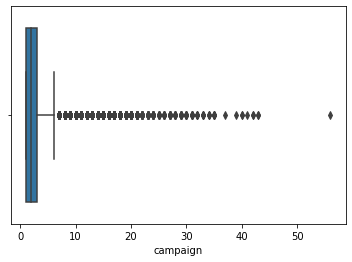

In [151]:
# Creating Box plot 
sns.boxplot(x='campaign', data=data)

Looks like most of the campaign happened within the range of 10. We will cap all the contacts more than 10 to 10.

In [152]:
data['campaign'][data['campaign']>10] = 10

In [153]:
no_of_prospects = data.groupby('campaign')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('campaign')['response'].sum().reset_index(name='count_yes_prospects')
campaign_df = no_of_prospects.merge(count_yes_prospects, on='campaign')
campaign_df['response_rate'] = ((campaign_df['count_yes_prospects']/campaign_df['no_of_prospects'])*100).round(2)
campaign_df

,campaign,no_of_prospects,count_yes_prospects,response_rate
0,1,17642,2300,13.04
1,2,10570,1211,11.46
2,3,5341,574,10.75
3,4,2651,249,9.39
4,5,1599,120,7.50
5,6,979,75,7.66
6,7,629,38,6.04
7,8,400,17,4.25
8,9,283,17,6.01
9,10,1094,39,3.56


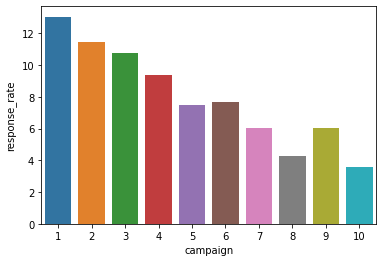

In [154]:
sns.barplot(x='campaign', y='response_rate', data=campaign_df)
plt.show()

We can see that the response rate is higher, when the number of campaigns are becoming lower.

#### pdays:-Gap after the last contact

In [155]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

The value 999 means the prospects were first time contacted. 

We will bucket the coulm in three categories below.

In [156]:
data['pdays'][data['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])] = 'contacted_in_first_10_days'

In [157]:
data['pdays'][data['pdays']==999] = 'contacted_first_time'

In [158]:
data['pdays'][~data['pdays'].isin(['contacted_in_first_10_days', 'contacted_first_time'])] = 'contacted_after_10_days'

In [159]:
data['pdays'].value_counts()

contacted_first_time          39673
contacted_in_first_10_days     1311
contacted_after_10_days         204
Name: pdays, dtype: int64

In [160]:
no_of_prospects = data.groupby('pdays')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('pdays')['response'].sum().reset_index(name='count_yes_prospects')
pdays_df = no_of_prospects.merge(count_yes_prospects, on='pdays')
pdays_df['response_rate'] = ((pdays_df['count_yes_prospects']/pdays_df['no_of_prospects'])*100).round(2)
pdays_df

,pdays,no_of_prospects,count_yes_prospects,response_rate
0,contacted_after_10_days,204,116,56.86
1,contacted_first_time,39673,3673,9.26
2,contacted_in_first_10_days,1311,851,64.91


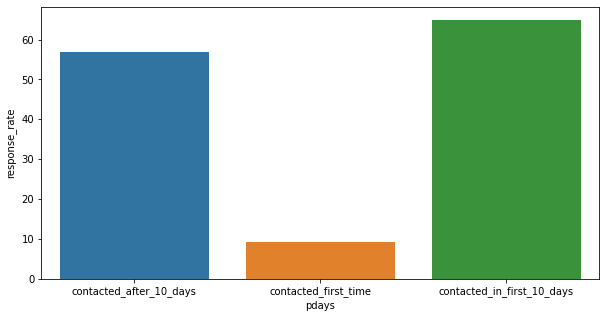

In [161]:
plt.figure(figsize=(10,5))
sns.barplot(x='pdays', y='response_rate', data=pdays_df)
plt.show()

We can see that the people contacted within first 10 days are more likely to be converted.

#### Previous

In [162]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories.

In [163]:
data['previous'][data['previous'].isin([0])]='never_contacted'
data['previous'][data['previous'].isin([1,2,3])]='less_than_3_times'
data['previous'][data['previous'].isin([4,5,6,7])]='more than_3_times'

In [164]:
no_of_prospects = data.groupby('previous')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('previous')['response'].sum().reset_index(name='count_yes_prospects')
previous_df = no_of_prospects.merge(count_yes_prospects, on='previous')
previous_df['response_rate'] = ((previous_df['count_yes_prospects']/previous_df['no_of_prospects'])*100).round(2)
previous_df

,previous,no_of_prospects,count_yes_prospects,response_rate
0,less_than_3_times,5531,1445,26.13
1,more than_3_times,94,54,57.45
2,never_contacted,35563,3141,8.83


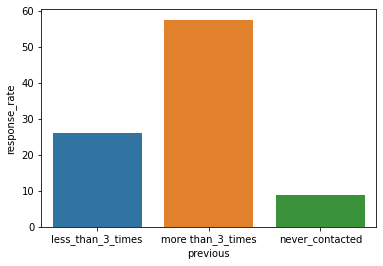

In [165]:
sns.barplot(x='previous', y='response_rate', data=previous_df)
plt.show()

We can see that that the customers, who were contacted more than three time are very much likely to take the product.

Now, we will look at the socio-economic variables.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

#### Employment Variation Rate

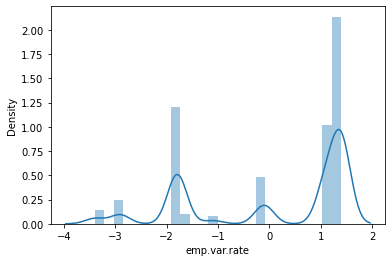

In [166]:
sns.distplot(data['emp.var.rate'])
plt.show()

In [167]:
no_of_prospects = data.groupby('emp.var.rate')['response'].count().reset_index(name='no_of_prospects')
count_yes_prospects = data[data['response']==1].groupby('emp.var.rate')['response'].sum().reset_index(name='count_yes_prospects')
emp_var_rate_df = no_of_prospects.merge(count_yes_prospects, on='emp.var.rate')
emp_var_rate_df['response_rate'] = ((emp_var_rate_df['count_yes_prospects']/emp_var_rate_df['no_of_prospects'])*100).round(2)
emp_var_rate_df

,emp.var.rate,no_of_prospects,count_yes_prospects,response_rate
0,-3.4,1071,454,42.39
1,-3.0,172,88,51.16
2,-2.9,1663,594,35.72
3,-1.8,9184,1461,15.91
4,-1.7,773,403,52.13
5,-1.1,635,301,47.40
6,-0.2,10,1,10.00
7,-0.1,3683,232,6.30
8,1.1,7763,240,3.09
9,1.4,16234,866,5.33


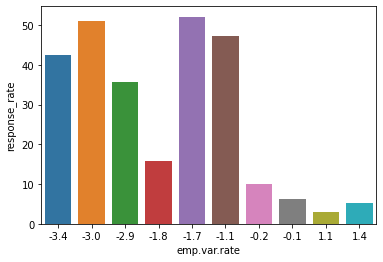

In [168]:
sns.barplot(x='emp.var.rate', y='response_rate', data=emp_var_rate_df)
plt.show()

We can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

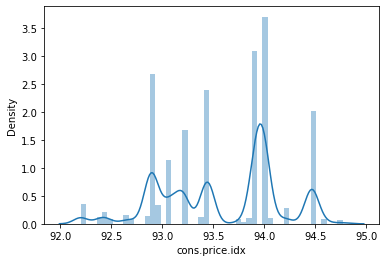

In [169]:
sns.distplot(data['cons.price.idx'])
plt.show()

In [170]:
data['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

#### Number of employeees

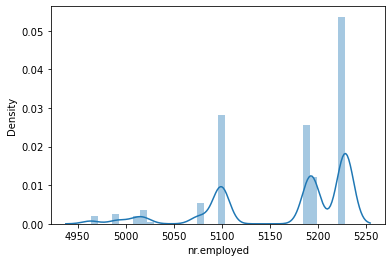

In [171]:
sns.distplot(data['nr.employed'])
plt.show()

In [172]:
data['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [173]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,Primary_Education,no,no,telephone,may,mon,1,contacted_first_time,never_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50, 60]"
1,57,services,married,Secondary_Education,no,no,telephone,may,mon,1,contacted_first_time,never_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50, 60]"
2,37,services,married,Secondary_Education,yes,no,telephone,may,mon,1,contacted_first_time,never_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30, 40]"
3,40,admin.,married,Primary_Education,no,no,telephone,may,mon,1,contacted_first_time,never_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30, 40]"
4,56,services,married,Secondary_Education,no,yes,telephone,may,mon,1,contacted_first_time,never_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50, 60]"


## Data preparation for model building

In [174]:
# Droping the column age_bins we had created for the purpose of data visualisation
data.drop(columns = 'age_bins', inplace = True)

In [175]:
# Create dummy variables for job
job = pd.get_dummies(data['job'], prefix='job', drop_first=True)
#Concat data and job
data = pd.concat([data, job], axis=1)

In [176]:
# Create dummy variables for marital
marital = pd.get_dummies(data['marital'], prefix='marital', drop_first=True)
#Concat data and marital
data = pd.concat([data, marital], axis=1)

In [177]:
# Create dummy variables for education
education = pd.get_dummies(data['education'], prefix='education', drop_first=True)
#Concat data and education
data = pd.concat([data, education], axis=1)

In [178]:
# Create dummy variables for housing
housing = pd.get_dummies(data['housing'], prefix='housing', drop_first=True)
#Concat data and housing
data = pd.concat([data, housing], axis=1)

In [179]:
# Create dummy variables for loan
loan = pd.get_dummies(data['loan'], prefix='loan', drop_first=True)
#Concat data and loan
data = pd.concat([data, loan], axis=1)

In [180]:
# Create dummy variables for contact
contact = pd.get_dummies(data['contact'], prefix='contact', drop_first=True)
#Concat data and contact
data = pd.concat([data, contact], axis=1)

In [181]:
# Create dummy variables for month
month = pd.get_dummies(data['month'], prefix='month', drop_first=True)
#Concat data and month
data = pd.concat([data, month], axis=1)

In [182]:
# Create dummy variables for day_of_week
day_of_week = pd.get_dummies(data['day_of_week'], prefix='day_of_week', drop_first=True)
#Concat data and day_of_week
data = pd.concat([data, day_of_week], axis=1)

In [183]:
# Create dummy variables for pdays
pdays = pd.get_dummies(data['pdays'], prefix='pdays', drop_first=True)
#Concat data and pdays
data = pd.concat([data, pdays], axis=1)

In [184]:
# Create dummy variables for poutcome
poutcome = pd.get_dummies(data['poutcome'], prefix='poutcome', drop_first=True)
#Concat data and poutcome
data = pd.concat([data, poutcome], axis=1)

In [185]:
# Create dummy variables for previous
previous = pd.get_dummies(data['previous'],prefix='previous',drop_first=True)
data = pd.concat([data,previous],axis=1)

In [186]:
# Drop all the columns for which dummy variables were created
data.drop(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'previous','pdays'], axis=1, inplace=True)

In [187]:
data.shape

(41188, 50)

In [188]:
data.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_contacted_first_time,pdays_contacted_in_first_10_days,poutcome_nonexistent,poutcome_success,previous_more than_3_times,previous_never_contacted
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1


### Train-Test split

In [189]:
from sklearn.model_selection import train_test_split
# Putting feature variables to X
X = data.drop('response', axis=1)
#Putting target variable to y
y = data['response']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Feature scaling

In [191]:
# Numeric columns
num_cols = ['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [192]:
# Scaling train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_contacted_first_time,pdays_contacted_in_first_10_days,poutcome_nonexistent,poutcome_success,previous_more than_3_times,previous_never_contacted
7019,-0.878700,0.765618,0.649769,0.723310,0.891842,0.715460,0.333624,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
27175,1.088859,0.274320,-0.114601,-0.650839,-0.319726,0.231941,0.400058,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
15817,-0.091676,0.274320,0.840862,0.591780,-0.471172,0.773091,0.847102,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
40971,2.761285,0.765618,-0.751576,1.773824,-1.942361,-1.509077,-2.813682,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
8467,-0.288432,0.274320,0.840862,1.538454,-0.276456,0.717766,0.847102,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


In [193]:
# Scaling test set
# We will only transform the test set on basis of what was learnt from the train set
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_contacted_first_time,pdays_contacted_in_first_10_days,poutcome_nonexistent,poutcome_success,previous_more than_3_times,previous_never_contacted
33148,-1.173834,-0.708276,-1.197458,-1.182153,-1.228402,-1.341372,-0.938309,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
27585,0.105080,0.765618,-0.114601,-0.650839,-0.319726,0.231941,0.400058,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
15722,-0.583566,-0.708276,0.840862,0.591780,-0.471172,0.773091,0.847102,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
40349,-1.173834,-0.216978,-1.133761,0.780422,0.480774,-1.567283,-2.426151,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2576,1.482371,-0.216978,0.649769,0.723310,0.891842,0.713155,0.333624,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1


### Model building

#### Principal Component Analysis

In [194]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[-1.40334707e+00, -1.91797915e-01, -1.22997548e-01, ...,
         7.98607289e-03,  5.80947545e-16,  2.47804561e-16],
       [-3.80917787e-02,  4.09072498e-01,  6.06270418e-01, ...,
         9.60902103e-03, -5.12253995e-15, -2.32781248e-16],
       [-1.44236166e+00, -8.07460873e-01,  1.54781145e-01, ...,
        -3.36327443e-03,  1.74022201e-14,  7.44716152e-16],
       ...,
       [-1.91065426e+00, -2.32801334e-01, -4.65478610e-01, ...,
        -2.68447612e-02, -9.78851567e-18, -6.87943785e-17],
       [-1.78718608e+00, -2.64541252e+00,  2.19189574e+00, ...,
        -8.81109255e-03, -8.70981879e-18, -1.49755354e-17],
       [ 3.37077089e+00,  4.34480912e+00,  8.89537284e-01, ...,
         1.21182143e-02,  3.52297241e-17,  2.02614932e-17]])

In [195]:
# Cumuliative variance
pd.Series((pca.explained_variance_ratio_.cumsum()*100).round(2))

0      33.21
1      44.14
2      53.09
3      61.36
4      67.19
5      70.51
6      73.12
7      75.51
8      77.77
9      79.73
10     81.62
11     83.48
12     85.30
13     87.08
14     88.75
15     90.25
16     91.40
17     92.48
18     93.24
19     93.97
20     94.56
21     95.09
22     95.61
23     96.07
24     96.49
25     96.90
26     97.30
27     97.64
28     97.96
29     98.26
30     98.53
31     98.78
32     99.00
33     99.18
34     99.34
35     99.49
36     99.60
37     99.72
38     99.78
39     99.84
40     99.88
41     99.91
42     99.94
43     99.96
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
dtype: float64

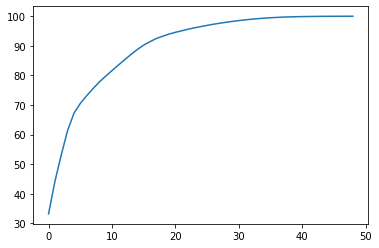

In [196]:
# Scree Plot for cumuliative variance 
plt.plot((pca.explained_variance_ratio_.cumsum()*100).round(2))
plt.show()

We can see that arount 15 variables explain 90% variance in the data.

In [197]:
# PCA with 15 components
pca_best = PCA(n_components=15, random_state=42)
X_train_pca = pca_best.fit_transform(X_train)

In [198]:
# Logistic model 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(class_weight='balanced')

In [199]:
# Fit the model
logistic_model.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [200]:
logistic_model.score(X_train_pca, y_train)

0.8179737088550518

#### Model evaluation on the train data

In [201]:
# Prediction on the test set
y_train_pred = logistic_model.predict(X_train_pca)

In [202]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[21522  4051]
 [ 1197  2061]]


In [203]:
# Sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred)
print("Sensitivity: ", round(sensitivity[0], 2), "\n", "Specificity: ", round(specificity[0], 2), sep='')

Sensitivity: 0.84
Specificity: 0.63


In [204]:
# ROC-AUC Score
y_train_pred_prob = logistic_model.predict_proba(X_train_pca)[:, 1]
print("AUC: ", round(roc_auc_score(y_train, y_train_pred_prob),2))

AUC:  0.78


#### Model evaluation on the test data

In [205]:
# Tranforming the test set in PCA
X_test_pca = pca_best.transform(X_test)

In [206]:
logistic_model.score(X_test_pca, y_test)

0.8128995710933075

In [207]:
# Prediction on the test set
y_test_pred = logistic_model.predict(X_test_pca)

In [208]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

[[9202 1773]
 [ 539  843]]


In [209]:
# Sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred)
print("Sensitivity: ", round(sensitivity[0], 2), "\n", "Specificity: ", round(specificity[0], 2), sep='')

Sensitivity: 0.84
Specificity: 0.61


In [210]:
# check area under curve
y_test_pred_prob = logistic_model.predict_proba(X_test_pca)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_test_pred_prob),2))

AUC:  0.78


## Gain Chart and Lift Chart

- ***Gain chart:*** It plots the responders captured against the number of prospects targeted.

    -It tells us the number of responders captured (y-axis) as a function of the number of prospects targeted (x-axis).
    

- ***Lift chart:*** It compares the response rate with and without using the model.

    -Compares the ‘lift in response rate’ you will get using the model viz-à-viz when you target the entire population (without      using the model)

    -Contains lift (on y-axis) and the number of prospects targeted (on x-axis)

In [211]:
# Data frame for actual, predicted and predicted probabilities
df_proba = pd.DataFrame()
df_proba['actual'] = y_test
df_proba['pred_proba'] = y_test_pred_prob
df_proba['predicted'] = y_test_pred
df_proba.head()

,actual,pred_proba,predicted
33148,0,0.492840,0
27585,0,0.332513,0
15722,0,0.257493,0
40349,1,0.930730,1
2576,0,0.188144,0


In [212]:
df_decile = df_proba

In [213]:
# Creating deciles
df_decile['decile'] = pd.qcut(df_decile['pred_proba'], 10, np.arange(10,0,-1))
df_decile

,actual,pred_proba,predicted,decile
33148,0,0.492840,0,3
27585,0,0.332513,0,5
15722,0,0.257493,0,8
40349,1,0.930730,1,1
2576,0,0.188144,0,10
...,...,...,...,...
35346,0,0.485009,0,3
17896,0,0.307555,0,6
33711,0,0.469710,0,3
39853,1,0.891623,1,1


In [214]:
# Group by the total prospects on basis of the deciles
df_lift = df_decile.groupby('decile')['pred_proba'].count().reset_index()
df_lift.rename({'pred_proba':'total'}, axis=1, inplace=True)
df_lift

,decile,total
0,10,1236
1,9,1236
2,8,1235
3,7,1236
4,6,1236
5,5,1235
6,4,1236
7,3,1235
8,2,1236
9,1,1236


In [215]:
# Creating dataframe for actual responses grouping by the deciles
df_lift_pred = df_decile[df_decile['actual']==1].groupby('decile')['actual'].count().reset_index()
df_lift_pred

,decile,actual
0,10,28
1,9,43
2,8,67
3,7,72
4,6,77
5,5,69
6,4,84
7,3,114
8,2,269
9,1,559


In [216]:
# Merging two dfs
df_lift_final = df_lift.merge(df_lift_pred, on='decile')
df_lift_final

,decile,total,actual
0,10,1236,28
1,9,1236,43
2,8,1235,67
3,7,1236,72
4,6,1236,77
5,5,1235,69
6,4,1236,84
7,3,1235,114
8,2,1236,269
9,1,1236,559


In [217]:
# Sort the deciles
df_lift_final = df_lift_final.sort_values('decile', ascending=False)
# Cumuliative response
df_lift_final['cum_response'] = df_lift_final['actual'].cumsum()
df_lift_final

,decile,total,actual,cum_response
9,1,1236,559,559
8,2,1236,269,828
7,3,1235,114,942
6,4,1236,84,1026
5,5,1235,69,1095
4,6,1236,77,1172
3,7,1236,72,1244
2,8,1235,67,1311
1,9,1236,43,1354
0,10,1236,28,1382


In [218]:
# Gain
df_lift_final['gain'] = round(100*(df_lift_final['cum_response']/df_lift_final['total']),2)
# Lift
df_lift_final['cum_lift'] = round(df_lift_final['gain']/(df_lift_final['decile'].astype('int')*10),2)
df_lift_final

,decile,total,actual,cum_response,gain,cum_lift
9,1,1236,559,559,45.23,4.52
8,2,1236,269,828,66.99,3.35
7,3,1235,114,942,76.28,2.54
6,4,1236,84,1026,83.01,2.08
5,5,1235,69,1095,88.66,1.77
4,6,1236,77,1172,94.82,1.58
3,7,1236,72,1244,100.65,1.44
2,8,1235,67,1311,106.15,1.33
1,9,1236,43,1354,109.55,1.22
0,10,1236,28,1382,111.81,1.12


### Gain Chart

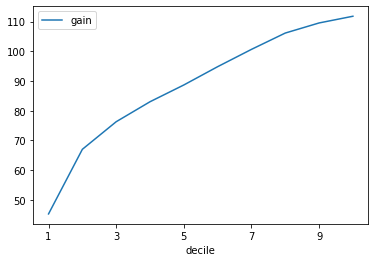

In [219]:
df_lift_final.plot(x='decile', y='gain')
plt.show()

We can see from the above Gain chart that in 5th decile the conversion rate is almost 90%. That means, if we target only top 50% customers, we will be able to capture 90% responders.

Hence, we can acquire 90% customers with the 50% cost.

### Lift Chart

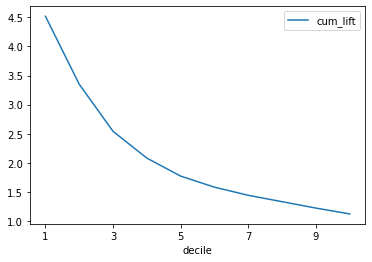

In [220]:
df_lift_final.plot(x='decile', y='cum_lift')
plt.show()

By using the model, we can reduce the cost of telemarketing by 50% by only targeting the specific prospects for selling the products. Without using the model, we had to target all the customer randomly, which results in lot time, effort and cost.